In [1]:
from __future__ import print_function, division
from builtins import range, input

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, BatchNormalization, Dropout, Activation, MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np

from Preprocessing_mod import Preprocessor, Data, DataSet
import pickle

with open('PreprocessorObject.obj', 'rb') as file:
    p = pickle.load(file)
with open('DataObject.data', 'rb') as file:
    data = pickle.load(file)
    
img_shape = p.shape
img_size_flat = img_shape[0]*img_shape[1]*img_shape[2]
IMG_SIZE = (img_shape[0], img_shape[0])
num_classes = len(p.label_ids)
num_channels = p.num_channels
epochs = 10
batch_size = 32

Using TensorFlow backend.


In [2]:
print(img_shape, img_size_flat, num_classes, num_channels)
print(len(data.train.inputs), len(data.test.inputs), len(data.valid.inputs))

(32, 32, 3) 3072 4 3
1559 194 199


In [3]:
data_con = np.concatenate((data.train.inputs, data.test.inputs, data.valid.inputs))
label_con = np.concatenate((data.train.labels, data.test.labels, data.valid.labels))
len(data_con)

1952

In [4]:
def y2indicator(Y):
    K = num_classes
    N = len(Y)
    I = np.zeros((N, K))
    I[np.arange(N), Y] = 1
    return I

In [5]:
X = data_con.reshape(-1, 32, 32, 3) / 255.0
Y = label_con.astype(np.int32)

In [6]:
K = len(set(Y))
Y = y2indicator(Y)

In [7]:
len(X)

1952

In [8]:
model = Sequential()

model.add(Conv2D(input_shape=(32, 32,3), filters = 32, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=300))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

r = model.fit(X, Y, validation_split=0.33, epochs=epochs, batch_size=batch_size)
print("Returned: ", r)

Instructions for updating:
Use tf.cast instead.
Train on 1307 samples, validate on 645 samples
Epoch 1/10
1307/1307 [==============================] - ETA: 2:08 - loss: 1.4807 - acc: 0.281 - ETA: 1:04 - loss: 1.2497 - acc: 0.437 - ETA: 42s - loss: 1.1227 - acc: 0.489 - ETA: 31s - loss: 1.0215 - acc: 0.55 - ETA: 25s - loss: 0.9338 - acc: 0.61 - ETA: 21s - loss: 0.8724 - acc: 0.66 - ETA: 17s - loss: 0.8062 - acc: 0.69 - ETA: 15s - loss: 0.7448 - acc: 0.72 - ETA: 13s - loss: 0.6830 - acc: 0.75 - ETA: 12s - loss: 0.6314 - acc: 0.77 - ETA: 10s - loss: 0.5871 - acc: 0.79 - ETA: 9s - loss: 0.5789 - acc: 0.8021 - ETA: 8s - loss: 0.5478 - acc: 0.812 - ETA: 8s - loss: 0.5188 - acc: 0.821 - ETA: 7s - loss: 0.4923 - acc: 0.831 - ETA: 6s - loss: 0.4812 - acc: 0.835 - ETA: 6s - loss: 0.4671 - acc: 0.840 - ETA: 5s - loss: 0.4458 - acc: 0.849 - ETA: 5s - loss: 0.4282 - acc: 0.855 - ETA: 4s - loss: 0.4097 - acc: 0.862 - ETA: 4s - loss: 0.3933 - acc: 0.869 - ETA: 4s - loss: 0.3776 - acc: 0.875 - ETA: 3s

1307/1307 [==============================] - ETA: 2s - loss: 6.0808e-04 - acc: 1.000 - ETA: 2s - loss: 0.0018 - acc: 1.0000    - ETA: 2s - loss: 0.0013 - acc: 1.000 - ETA: 2s - loss: 0.0014 - acc: 1.000 - ETA: 2s - loss: 0.0013 - acc: 1.000 - ETA: 1s - loss: 0.0012 - acc: 1.000 - ETA: 1s - loss: 0.0012 - acc: 1.000 - ETA: 1s - loss: 0.0011 - acc: 1.000 - ETA: 1s - loss: 0.0012 - acc: 1.000 - ETA: 1s - loss: 0.0056 - acc: 0.996 - ETA: 1s - loss: 0.0056 - acc: 0.997 - ETA: 1s - loss: 0.0052 - acc: 0.997 - ETA: 1s - loss: 0.0048 - acc: 0.997 - ETA: 1s - loss: 0.0045 - acc: 0.997 - ETA: 1s - loss: 0.0044 - acc: 0.997 - ETA: 1s - loss: 0.0042 - acc: 0.998 - ETA: 1s - loss: 0.0040 - acc: 0.998 - ETA: 1s - loss: 0.0039 - acc: 0.998 - ETA: 1s - loss: 0.0040 - acc: 0.998 - ETA: 1s - loss: 0.0039 - acc: 0.998 - ETA: 1s - loss: 0.0042 - acc: 0.998 - ETA: 1s - loss: 0.0041 - acc: 0.998 - ETA: 1s - loss: 0.0041 - acc: 0.998 - ETA: 0s - loss: 0.0042 - acc: 0.998 - ETA: 0s - loss: 0.0041 - acc: 0.998

1307/1307 [==============================] - ETA: 2s - loss: 2.6423e-04 - acc: 1.000 - ETA: 2s - loss: 4.0819e-04 - acc: 1.000 - ETA: 2s - loss: 3.0881e-04 - acc: 1.000 - ETA: 2s - loss: 4.8416e-04 - acc: 1.000 - ETA: 2s - loss: 3.9612e-04 - acc: 1.000 - ETA: 1s - loss: 3.6051e-04 - acc: 1.000 - ETA: 1s - loss: 3.3586e-04 - acc: 1.000 - ETA: 1s - loss: 3.1160e-04 - acc: 1.000 - ETA: 1s - loss: 3.6306e-04 - acc: 1.000 - ETA: 1s - loss: 3.4685e-04 - acc: 1.000 - ETA: 1s - loss: 3.3165e-04 - acc: 1.000 - ETA: 1s - loss: 3.3558e-04 - acc: 1.000 - ETA: 1s - loss: 3.2034e-04 - acc: 1.000 - ETA: 1s - loss: 3.0230e-04 - acc: 1.000 - ETA: 1s - loss: 2.9455e-04 - acc: 1.000 - ETA: 1s - loss: 2.8179e-04 - acc: 1.000 - ETA: 1s - loss: 2.9505e-04 - acc: 1.000 - ETA: 1s - loss: 2.8739e-04 - acc: 1.000 - ETA: 1s - loss: 2.8119e-04 - acc: 1.000 - ETA: 1s - loss: 2.7253e-04 - acc: 1.000 - ETA: 1s - loss: 2.6492e-04 - acc: 1.000 - ETA: 1s - loss: 2.5850e-04 - acc: 1.000 - ETA: 1s - loss: 2.5379e-04 - ac

In [10]:
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


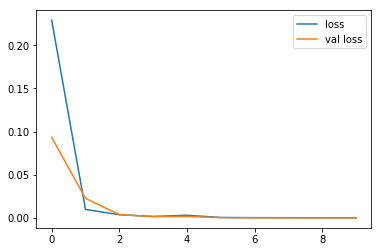

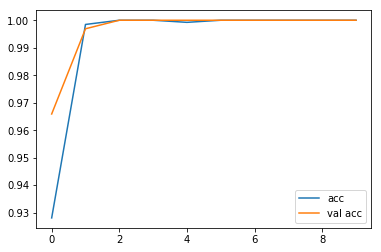

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [12]:
model.predict(X)

array([[2.2265847e-06, 9.9999201e-01, 5.2978730e-06, 4.9637771e-07],
       [9.9999404e-01, 3.2357775e-06, 9.0425613e-07, 1.7533592e-06],
       [1.2958442e-06, 9.9992430e-01, 3.0689014e-05, 4.3710454e-05],
       ...,
       [9.9985850e-01, 1.3717746e-06, 5.5617020e-05, 8.4374886e-05],
       [2.5680845e-06, 9.9999285e-01, 3.4049801e-06, 1.0625129e-06],
       [1.0938888e-05, 1.0333128e-04, 9.9973959e-01, 1.4612821e-04]],
      dtype=float32)

In [13]:
import cv2
import os
from tqdm import tqdm

In [14]:
BASE_DIR = os.path.dirname(os.path.abspath(''))
print("[INFO] Loading Caffe model...")
net = cv2.dnn.readNetFromCaffe("deploy.prototxt.txt", "res10_300x300_ssd_iter_140000.caffemodel")
fourcc = cv2.VideoWriter_fourcc(*'XVID')
kernel = np.ones((20, 20), np.float32) / 400
print("[INFO] Starting video encoding...")
cap = cv2.VideoCapture('video.mp4')
writer = None
face_names = ['sangjun', 'taekjung', 'taejong', 'yongdae']
fsize = (300, 300)

[INFO] Loading Caffe model...
[INFO] Starting video encoding...


In [15]:
while cap.isOpened():
    _, frame = cap.read()
    if frame is None:
        break

    if writer is None:
        writer = cv2.VideoWriter('video_keras.mp4', fourcc, 30, (frame.shape[1], frame.shape[0]))

    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, fsize, interpolation=cv2.INTER_AREA), 1.0, fsize, (104.0, 177.0, 123.0))

    net.setInput(blob)
    detections = net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if 0 > detections[0, 0, i, 3] or detections[0, 0, i, 3] > 1 or 0 > detections[0, 0, i, 4] \
                or detections[0, 0, i, 4] > 1 or 0 > 0 or detections[0, 0, i, 5] > 1 \
                or 0 > detections[0, 0, i, 6] or detections[0, 0, i, 6] > 1 or confidence < 0.8:
            continue
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        roi = frame[startY:endY, startX:endX]
        roi = cv2.resize(roi, (32, 32), interpolation=cv2.INTER_AREA)
        roi = np.expand_dims(roi, axis=0)
        text = str(model.predict(roi))
        cv2.putText(frame, text, (startX, startY), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4)
    writer.write(frame)

writer.release()
cv2.destroyAllWindows()
cap.release()